# PN2V Training
Here we will use the generated noise model and train a PN2V network on single noisy images.
Please run the 'Convallaria-1-CreateNoiseModel' notebook first.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from unet.model import UNet

from pn2v import utils
from pn2v import histNoiseModel
from pn2v import training
from tifffile import imread
# See if we can use a GPU
device=utils.getDevice()

CUDA available? True


### Load Data

In [3]:
path='data/Convallaria_diaphragm/'

# Load the training data
data=imread(path+'20190520_tl_25um_50msec_05pc_488_130EM_Conv.tif')

In [4]:
# We are loading the histogram from the 'Convallaria-1-CreateNoiseModel' notebook
histogram=np.load(path+'noiseModel.npy')

# Create a NoiseModel object from the histogram.
noiseModel=histNoiseModel.NoiseModel(histogram, device=device)

### Create the Network and Train it
This can take a while.

In [5]:
# Create a network with 800 output channels that are interpreted as samples from the prior.
net = UNet(800, depth=3)

# Split training and validation data.
my_train_data=data[:-5].copy()
my_val_data=data[-5:].copy()

# Start training.
trainHist, valHist = training.trainNetwork(net=net, trainData=my_train_data, valData=my_val_data,
                                           postfix='conv', directory=path, noiseModel=noiseModel,
                                           device=device, numOfEpochs= 100, stepsPerEpoch=5)

/home/krull/projects/pn2vCheck/pn2v/unet/model.py:215: UserWarning: nn.init.xavier_normal is now deprecated in favor of nn.init.xavier_normal_.
  init.xavier_normal(m.weight)
/home/krull/projects/pn2vCheck/pn2v/unet/model.py:216: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  init.constant(m.bias, 0)


Epoch 0 finished      
avg. loss: 4.828270506858826+-(2SEM)0.1729602988638189      
Epoch 1 finished      
avg. loss: 4.068684279918671+-(2SEM)0.07539298678448518      
Epoch 2 finished      
avg. loss: 3.8612277626991274+-(2SEM)0.0472511315209929      
Epoch 3 finished      
avg. loss: 3.8624621629714966+-(2SEM)0.055359935434300026      
Epoch 4 finished      
avg. loss: 3.7244805216789247+-(2SEM)0.06268132630991505      
Epoch 5 finished      
avg. loss: 3.752237868309021+-(2SEM)0.06591269315801568      
Epoch 6 finished      
avg. loss: 3.6768921613693237+-(2SEM)0.062207044699445144      
Epoch 7 finished      
avg. loss: 3.634579062461853+-(2SEM)0.08254525990963044      
Epoch 8 finished      
avg. loss: 3.6071239590644835+-(2SEM)0.07674561444496499      
Epoch 9 finished      
avg. loss: 3.545901620388031+-(2SEM)0.0567937394947525      
Epoch 10 finished      
avg. loss: 3.4472676038742067+-(2SEM)0.062203922456008566      
Epoch 11 finished      
avg. loss: 3.481775367259979+-(2SE

Epoch 93 finished      
avg. loss: 2.9938396334648134+-(2SEM)0.05092279524259311      
Epoch 94 finished      
avg. loss: 3.0064658641815187+-(2SEM)0.054909437033789504      
Epoch 95 finished      
avg. loss: 2.906344640254974+-(2SEM)0.04056401177709024      
Epoch 96 finished      
avg. loss: 2.969343638420105+-(2SEM)0.05788820227147032      
Epoch 97 finished      
avg. loss: 3.0004247784614564+-(2SEM)0.06751210705694385      
Epoch    97: reducing learning rate of group 0 to 6.2500e-06.
Epoch 98 finished      
avg. loss: 2.967023777961731+-(2SEM)0.05367897348316204      
Epoch 99 finished      
avg. loss: 2.938778579235077+-(2SEM)0.055033456456032      
Finished Training      


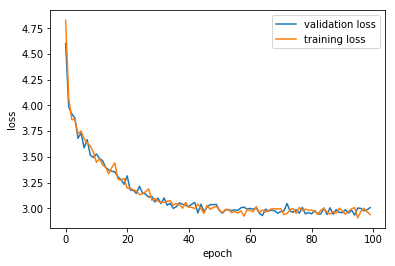

In [6]:
# Let's look at the training and validation loss
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(valHist, label='validation loss')
plt.plot(trainHist, label='training loss')
plt.legend()
plt.show()